In [358]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [359]:
data = pd.read_csv('data/Darknet_2.csv')

In [360]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,7/24/2015 16:09,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,7/24/2015 16:09,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,7/24/2015 16:09,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,7/24/2015 16:09,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,7/24/2015 16:09,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [362]:
data['Label'].unique()

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [363]:
data['Label.1'].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

In [364]:
data= data[data["Label.1"].isin(['Video-Streaming', 'Chat'])]
data.head()


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,3,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


In [365]:
data.drop(columns='Timestamp', inplace=True)
data.drop(columns='Dst IP', inplace=True)
data.drop(columns='Flow ID', inplace=True)
data.head()

,Src IP,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
32871,5.9.28.6,5222,56297,6,60320002,5,3,447,117,165,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
32872,8.6.0.1,0,0,0,100709850,6,0,0,0,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
32873,5.9.28.6,5222,56297,6,116498878,12,12,5848,2596,933,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
32874,8.6.0.1,0,0,0,93296196,6,0,0,0,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
32875,5.9.28.6,5222,56297,6,91832679,14,14,6029,2761,741,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat


In [366]:
encoder = LabelEncoder()
data['Label'] = encoder.fit_transform(data['Label'])
data['Label.1'] = encoder.fit_transform(data['Label.1'])
data.head()

,Src IP,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
32871,5.9.28.6,5222,56297,6,60320002,5,3,447,117,165,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0,0
32872,8.6.0.1,0,0,0,100709850,6,0,0,0,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0,0
32873,5.9.28.6,5222,56297,6,116498878,12,12,5848,2596,933,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0,0
32874,8.6.0.1,0,0,0,93296196,6,0,0,0,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0,0
32875,5.9.28.6,5222,56297,6,91832679,14,14,6029,2761,741,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0,0


In [367]:
data['Label'].unique()

array([0, 1, 2, 3])

In [368]:
data['Label.1'].unique()

array([0, 1])

In [369]:
data.head()

,Src IP,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
32871,5.9.28.6,5222,56297,6,60320002,5,3,447,117,165,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0,0
32872,8.6.0.1,0,0,0,100709850,6,0,0,0,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0,0
32873,5.9.28.6,5222,56297,6,116498878,12,12,5848,2596,933,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0,0
32874,8.6.0.1,0,0,0,93296196,6,0,0,0,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0,0
32875,5.9.28.6,5222,56297,6,91832679,14,14,6029,2761,741,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0,0


In [370]:
data.isnull().sum()

Src IP           0
Src Port         0
Dst Port         0
Protocol         0
Flow Duration    0
                ..
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Label.1          0
Length: 82, dtype: int64

In [371]:
data.columns

Index(['Src IP', 'Src Port', 'Dst Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
 

In [372]:
data['Src IP'].unique

<bound method Series.unique of 32871           5.9.28.6
32872            8.6.0.1
32873           5.9.28.6
32874            8.6.0.1
32875           5.9.28.6
               ...      
140358     54.243.90.245
140359    209.148.205.16
140360        10.8.8.138
140361    209.148.205.41
140362        10.8.8.138
Name: Src IP, Length: 20964, dtype: object>

In [373]:
data.drop(columns='Src IP', inplace=True)

In [374]:
X= data.iloc[ : , :-1]
y = data.iloc[: , -1]

In [375]:
X

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
32871,5222,56297,6,60320002,5,3,447,117,165,0,...,20,0,0,0,0,1.437590e+15,3.279907e+07,1.437590e+15,1.437590e+15,0
32872,0,0,0,100709850,6,0,0,0,0,0,...,0,0,0,0,0,1.437590e+15,4.148861e+07,1.437590e+15,1.437590e+15,0
32873,5222,56297,6,116498878,12,12,5848,2596,933,0,...,20,0,0,0,0,1.437590e+15,3.454091e+07,1.437590e+15,1.437590e+15,0
32874,0,0,0,93296196,6,0,0,0,0,0,...,0,0,0,0,0,1.437590e+15,4.664715e+07,1.437590e+15,1.437590e+15,0
32875,5222,56297,6,91832679,14,14,6029,2761,741,0,...,20,0,0,0,0,1.437590e+15,3.067507e+07,1.437590e+15,1.437590e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140358,443,44661,6,24,1,1,0,0,0,0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
140359,80,58763,6,13,1,1,0,0,0,0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
140360,39095,443,17,726530,13,12,10882,7625,1350,40,...,8,0,0,0,0,1.432490e+15,1.771270e+05,1.432490e+15,1.432490e+15,3
140361,80,57839,6,20,1,1,0,0,0,0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3


In [376]:
y

32871     0
32872     0
32873     0
32874     0
32875     0
         ..
140358    1
140359    1
140360    1
140361    1
140362    1
Name: Label.1, Length: 20964, dtype: int32

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)

In [378]:
print("X-train:",X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-test:", y_test.shape)

X-train: (16771, 80)
X-test: (4193, 80)
y-train: (16771,)
y-test: (4193,)


In [379]:
X_train

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
110579,52170,5355,17,413857,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
111336,51620,5355,17,414449,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
93522,60035,5355,17,419850,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
32939,43956,40181,6,382,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
110972,58748,5355,17,425055,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111256,59923,5355,17,418490,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
121901,36711,53,17,130805,1,1,34,141,34,34,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,3
114542,58655,53,17,322,1,1,22,97,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
114596,51148,80,6,74918050,9,8,0,0,0,0,...,32,0,0,0,0,1.427900e+15,21481004.23,1.427900e+15,1.427900e+15,1


In [380]:
model = Sequential()

In [381]:
model.add(Dense(20, input_shape =(80,), activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (None, 20)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,641 (6.41 KB)

 Trainable params: 1,641 (6.41 KB)

 Non-trainable params: 0 (0.00 B)

In [382]:
history = model.fit(X_train,y_train, epochs=5,verbose=1, validation_data=(X_test,y_test))

Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5369 - loss: 80459726848.0000 - val_accuracy: 0.5478 - val_loss: 0.6890
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5433 - loss: 0.6895 - val_accuracy: 0.5478 - val_loss: 0.6886
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5464 - loss: 0.6889 - val_accuracy: 0.5478 - val_loss: 0.6886
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5530 - loss: 0.6875 - val_accuracy: 0.5478 - val_loss: 0.6886
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5425 - loss: 0.6896 - val_accuracy: 0.5478 - val_loss: 0.6886


In [383]:
history

In [384]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

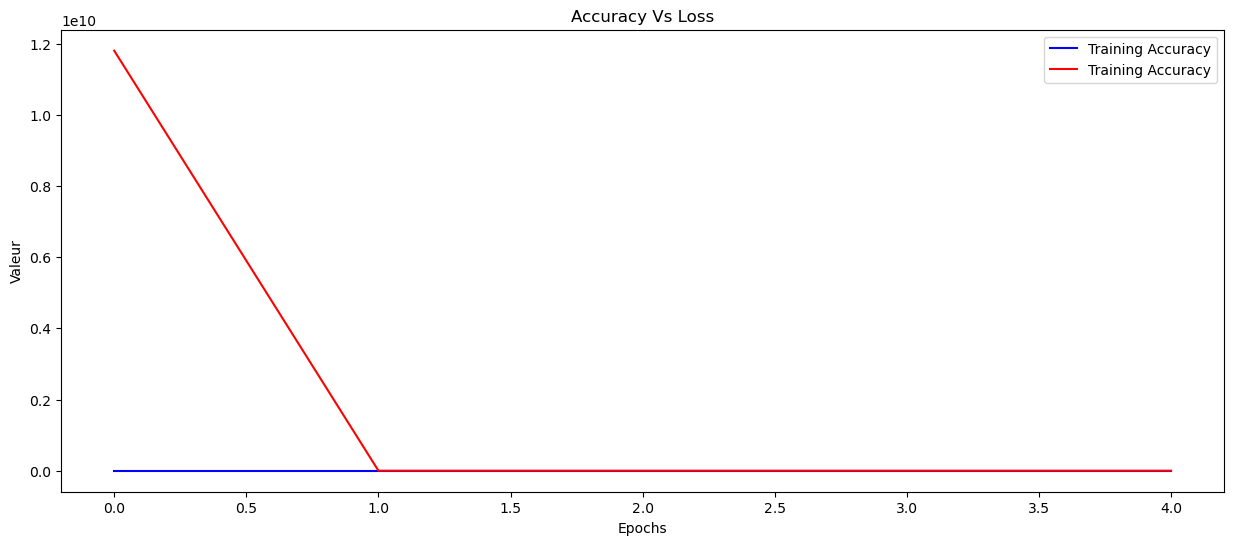

In [385]:
plt.figure(figsize=(15,6))
plt.plot(range(0, len(epoch_accuracy)),epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)),epoch_loss, color='red', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.plot()
plt.show()

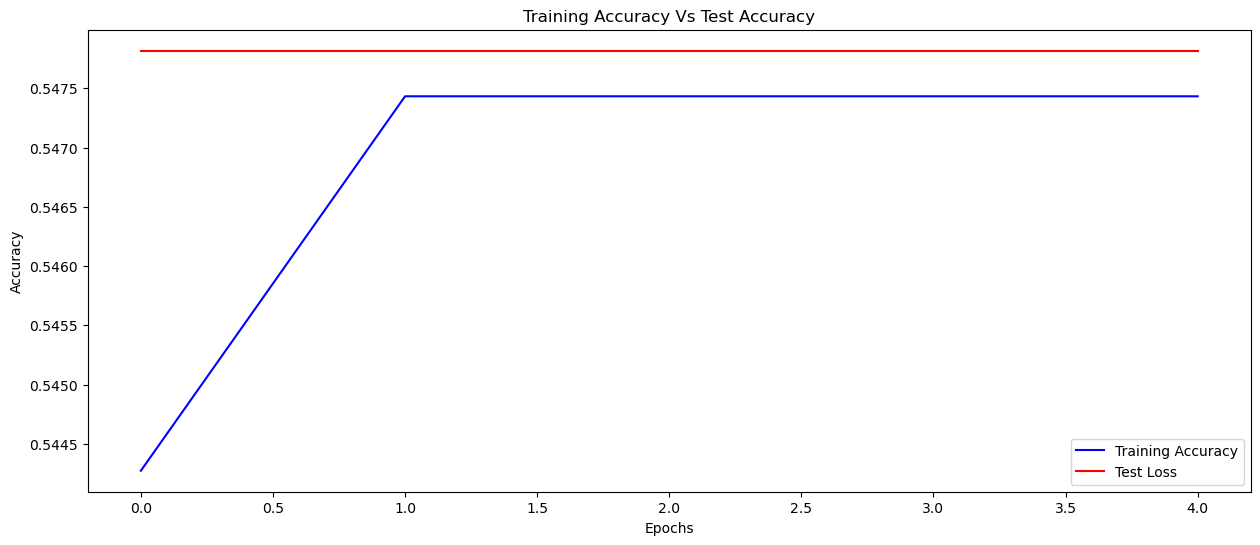

In [386]:
plt.figure(figsize=(15,6))
plt.plot(range(0,len(epoch_accuracy)),epoch_accuracy, color= 'blue', label= 'Training Accuracy')
plt.plot(range(0,len(epoch_val_accuracy)),epoch_val_accuracy, color='red',label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.plot()
plt.show()

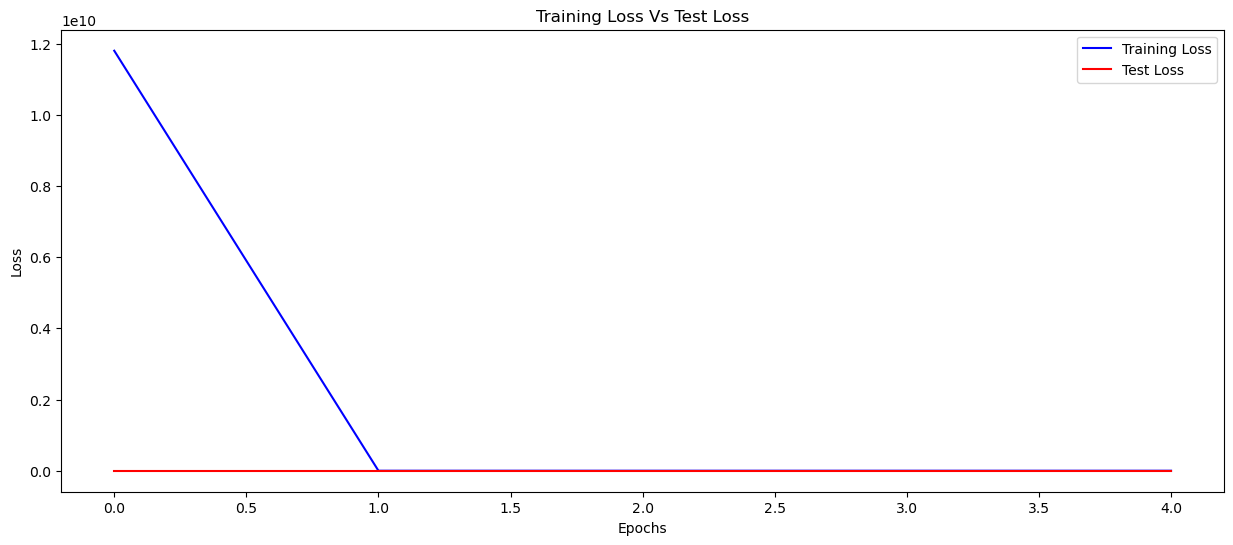

In [387]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.plot()
plt.show()

In [388]:
model.evaluate(X_test, y_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.5478 - loss: 0.6886


[0.6885684132575989, 0.5478177666664124]

In [389]:
model_dnn = Sequential()

In [390]:
opt =' Adam'
epo = 10

In [391]:
model_dnn.add(Dense(32, input_shape=(20,) , activation ='relu'))

# 2eme couche
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))


# La couche de sortie
model_dnn.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model_dnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,321 (63.75 KB)

 Trainable params: 16,321 (63.75 KB)

 Non-trainable params: 0 (0.00 B)

In [401]:
#scaler = StandardScaler()

In [400]:
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [394]:
#X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.3, random_state=40)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

#X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.8, random_state=40)

In [395]:
#history=model_dnn.fit(X_train,y_train, epochs=epo, verbose=1,validation_data=(X_val,y_val))

In [396]:
#epoch_accuracy = history.history['accuracy']
#epoch_loss = history.history['loss']

#epoch_val_accuracy = history.history['val_accuracy']
#epoch_val_loss = history.history['val_loss']

In [397]:
#plt.figure(figsize=(13, 6))
#plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
#plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.title('Training Loss Vs Test Loss')
#plt.legend()
#plt.plot()